# Garments Project (by: The Guo Family)

Garmets are worn every day by humans around the world. From the famous and highly sought after fashion houses such as the Haus of Gucci, Louis Vitton, Dior, down to the smaller fashion labels, humans have the tendency to buy what is on the shelf. But, behind all the garments that are sold on a day to day basis, what goes behind the scenes? In this project, we want to look at the reasoning between the overtime that happens in this current fashion house together with making three (3) models to predict the number of overtime that will happen in the future.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import os

In [2]:
df = pd.read_csv('garments.csv') # Importing garments.csv file to a pandas dataframe

After importing the dataset into the dataframe, we now look for errors and see what can we do for null cells.

In [3]:
# Dataset structure
print(df.info())  # Column names, data types, and non-null counts
print(df.describe())  # Statistics for numeric columns
print(df.head())  # Preview the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

We see that there are null values in the WIP column, highlighted in the figure below:

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


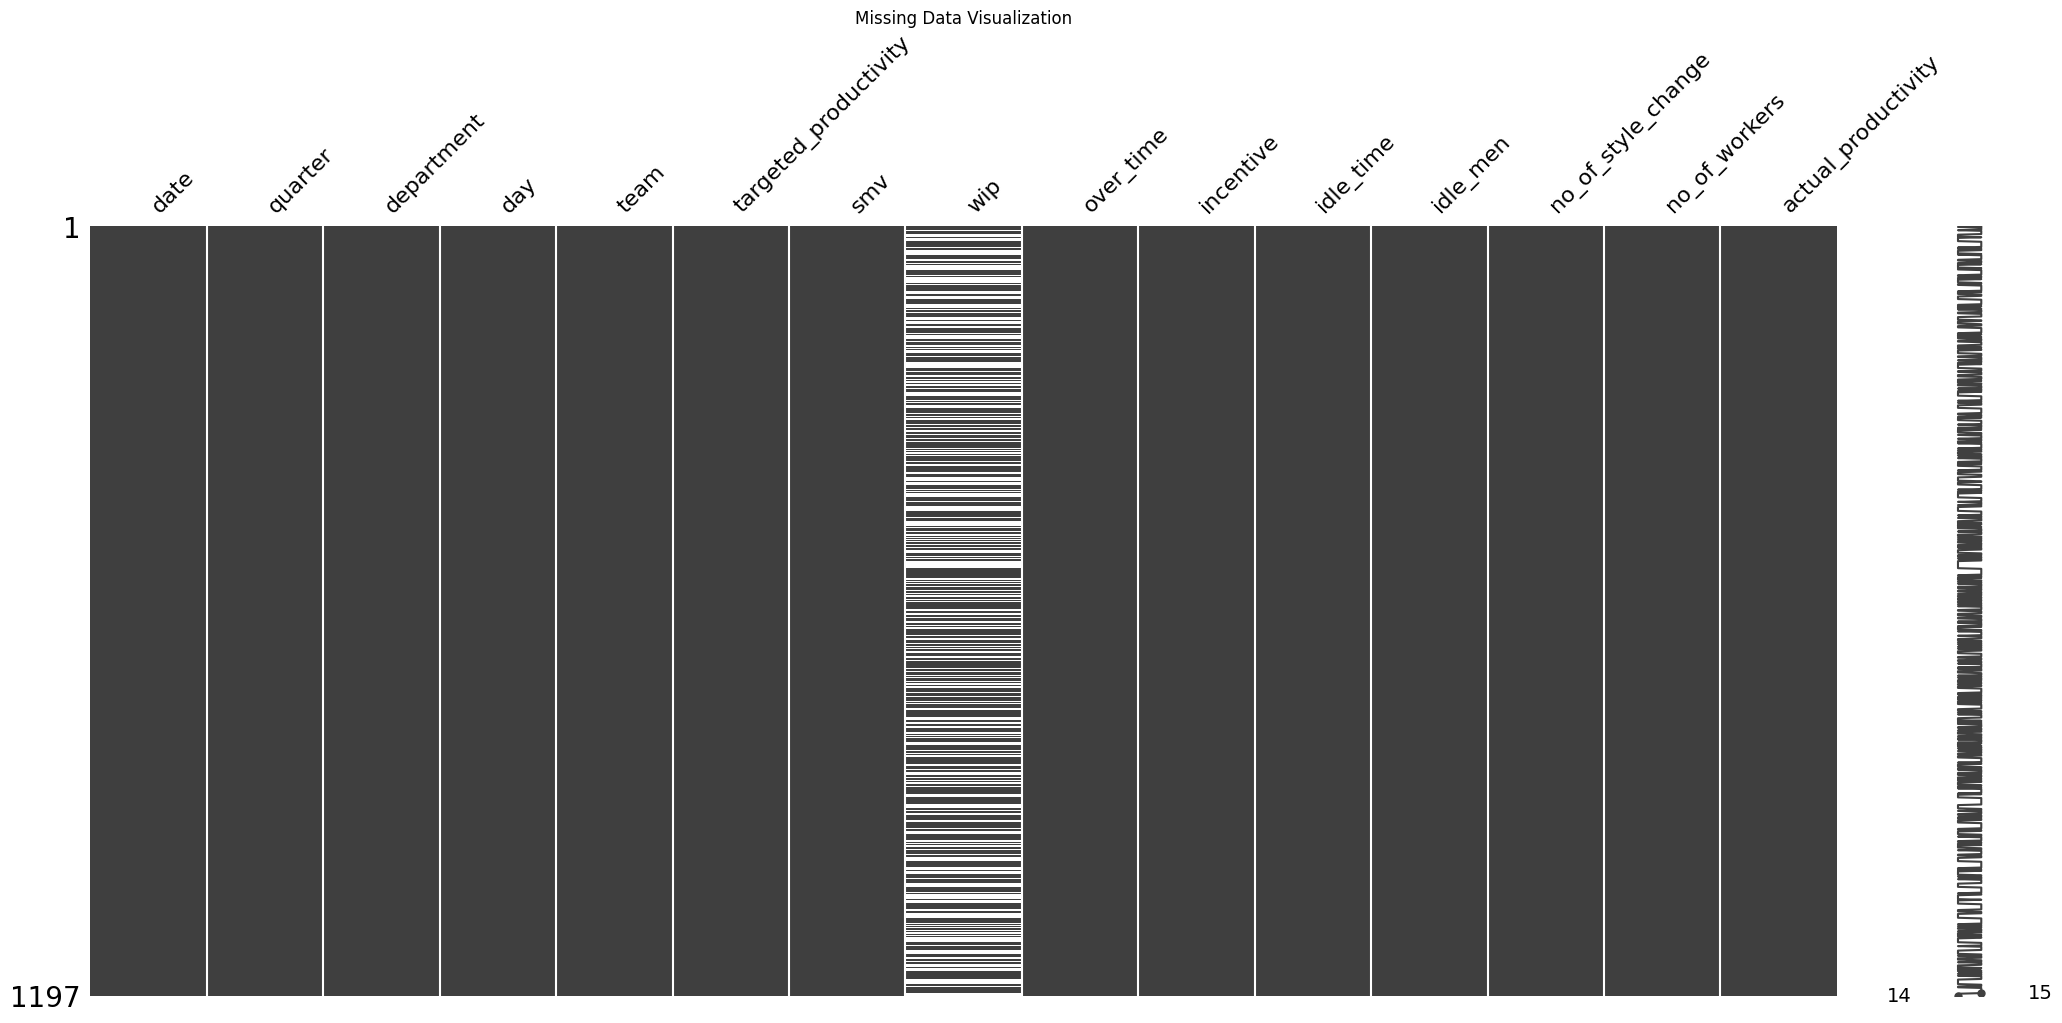

In [4]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

The team chose to replace empty cells with zero. This is doable since WIP stands for "work in progress" if the cell is null, it means that there are no projects that are "work in progress", making them null.

In [5]:
# Replace NaN values with 0
df = df.fillna(0)

# Replace empty strings with 0
df = df.replace('', 0)

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


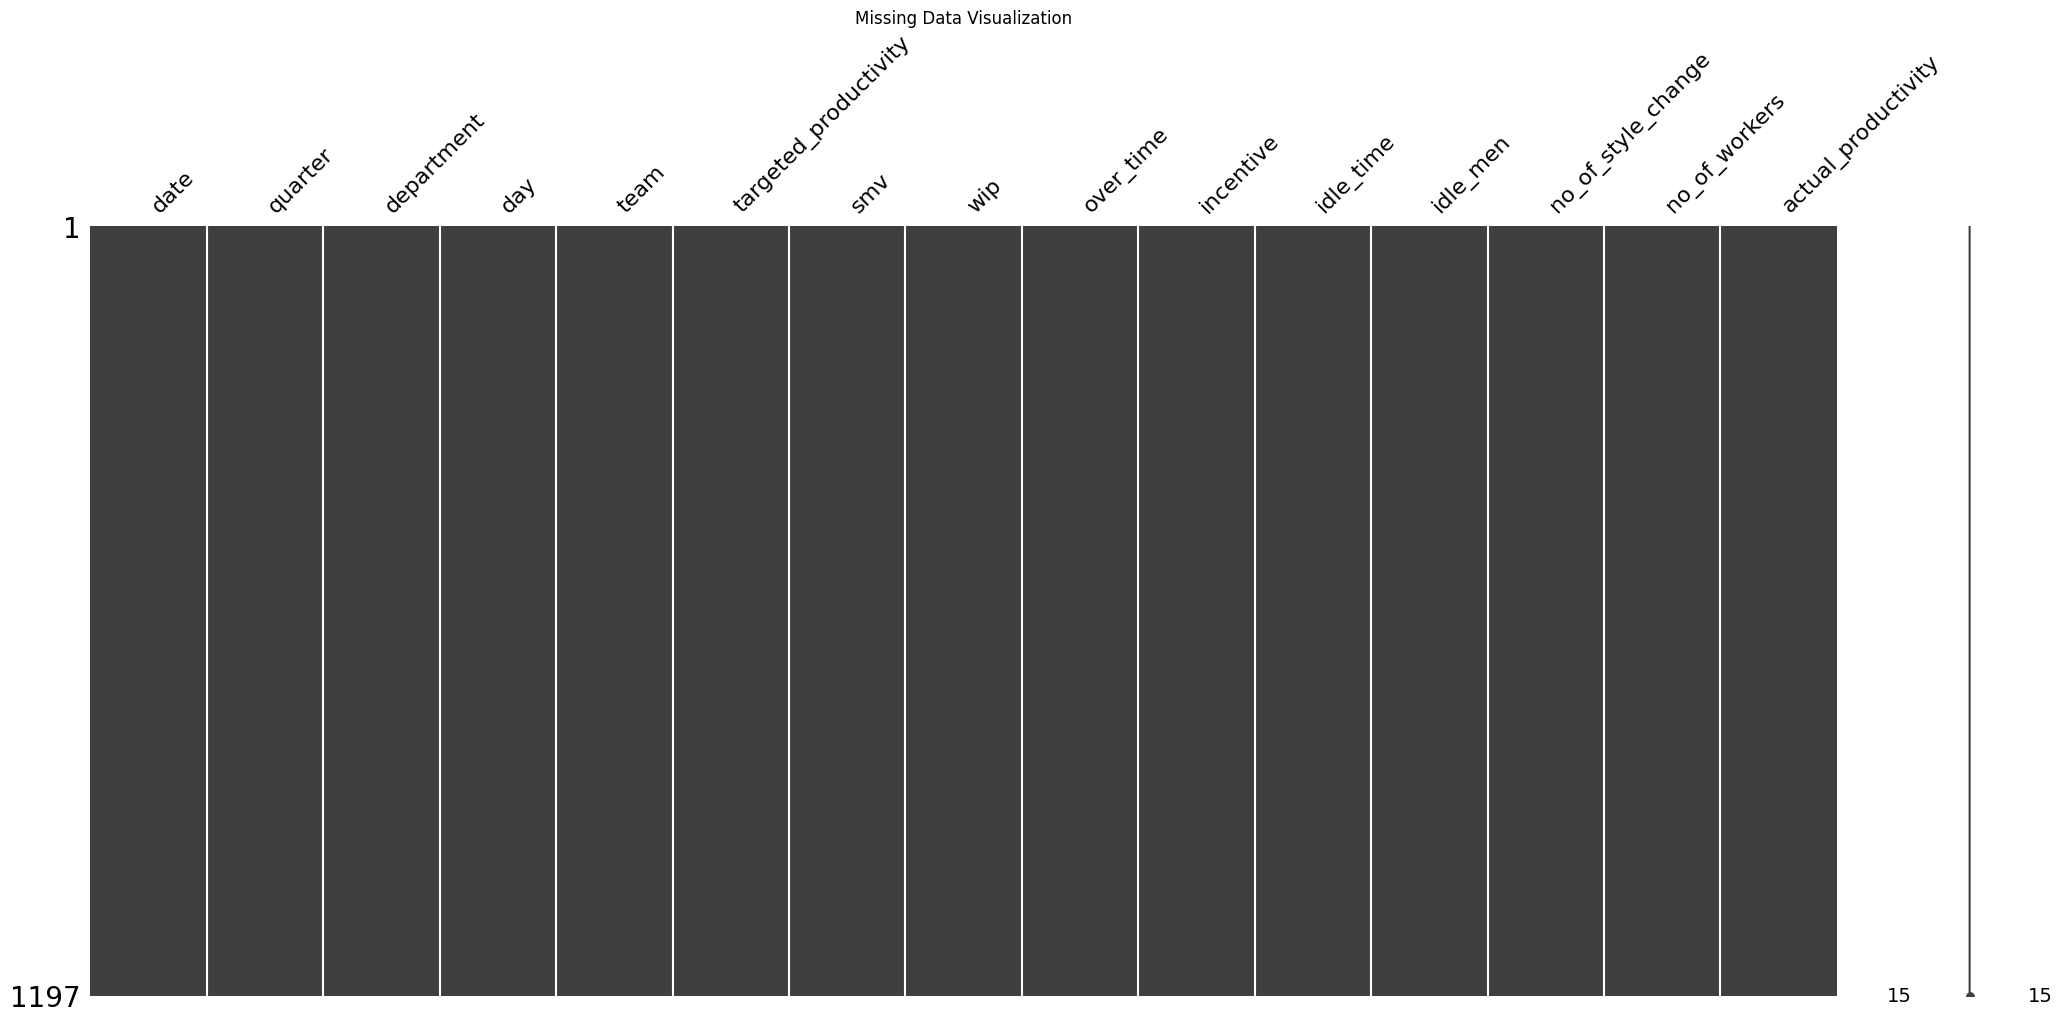

In [6]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

Here we're making sure that the dataset does not have any more null cells.

Afterwards, we normalize the values to make sure that all numerical features have the same impact on the model.

In [7]:
over_time = df['over_time']

true_numeric_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                        'no_of_style_change', 'no_of_workers']
numeric_columns = df[true_numeric_columns]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numeric columns and update the DataFrame
df[numeric_columns.columns] = scaler.fit_transform(numeric_columns)
df['unscalled_over_time'] = over_time

After normalizing the values, we move on to adding some columns to help with parsing through data.

In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month  # Extract the month

Finally, we move on to looking at the data itself and see what does it mean to this certain fashion haus.

# Exploring the data

Firstly, we look at the distribution of each numerical data and see what it means to the data itself.

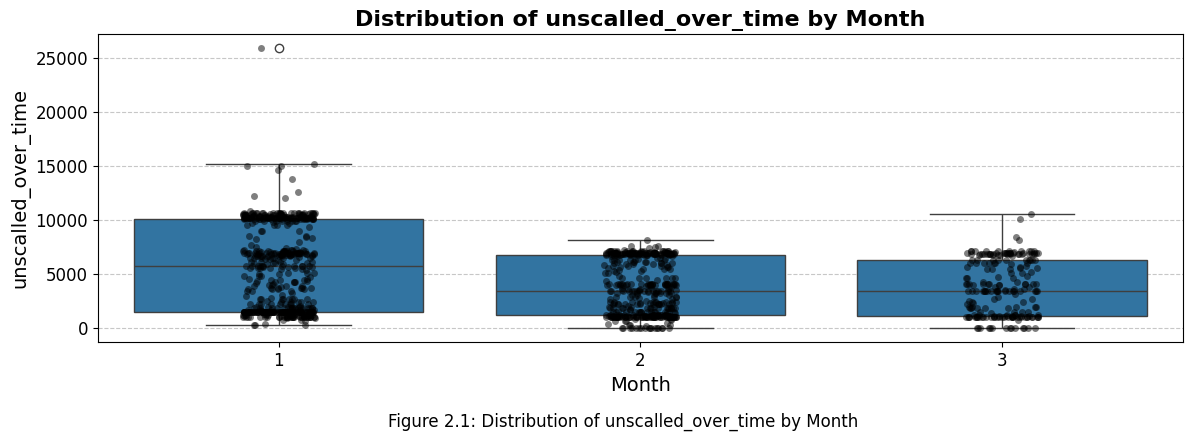

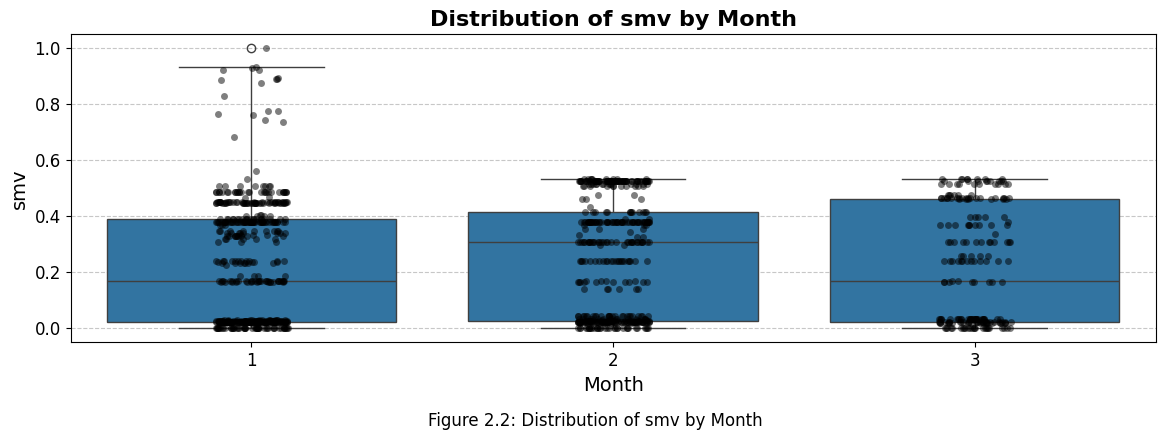

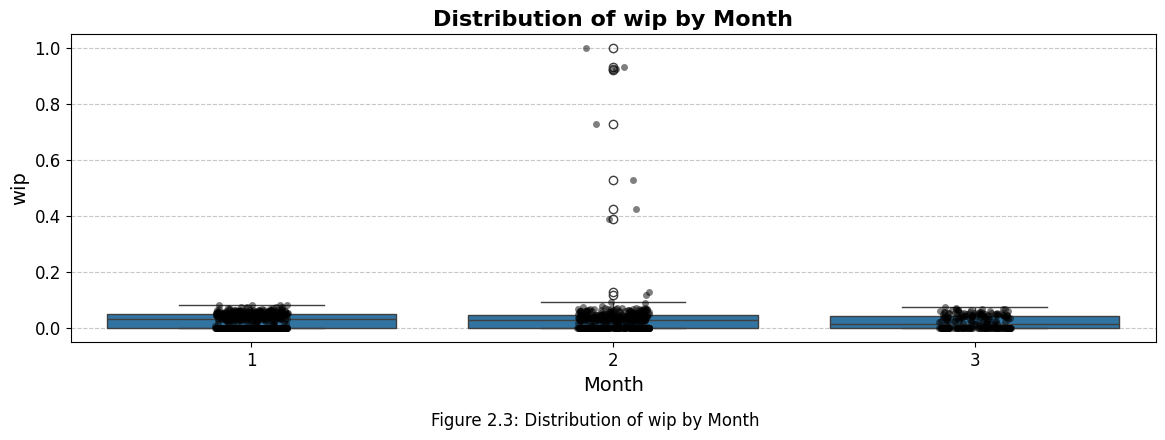

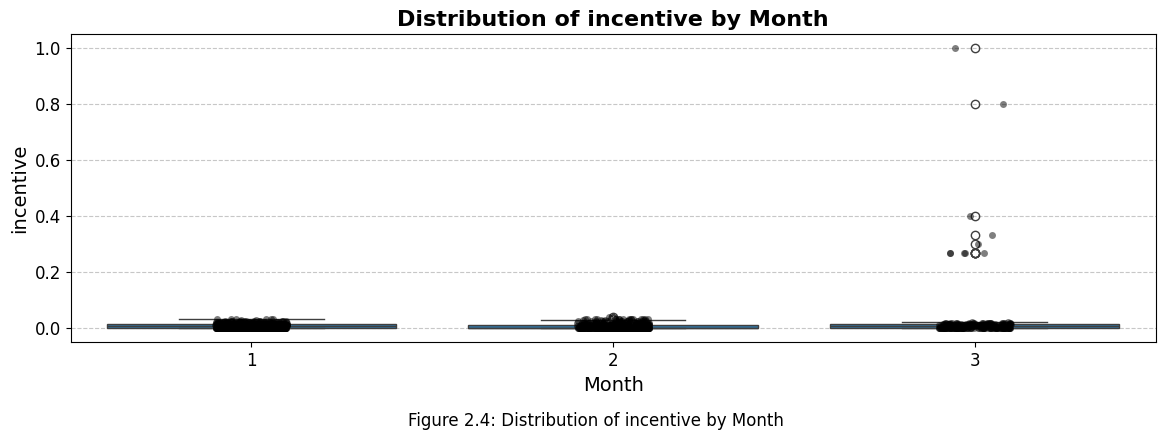

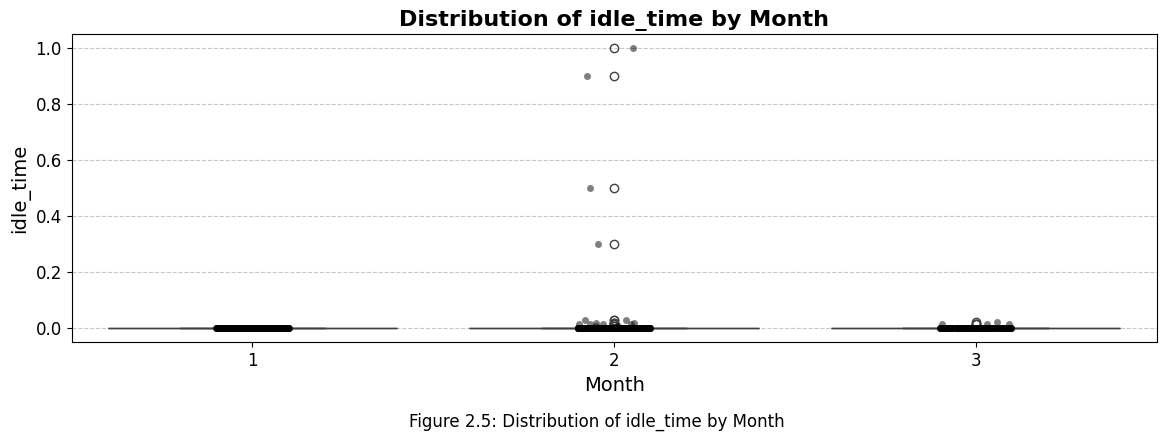

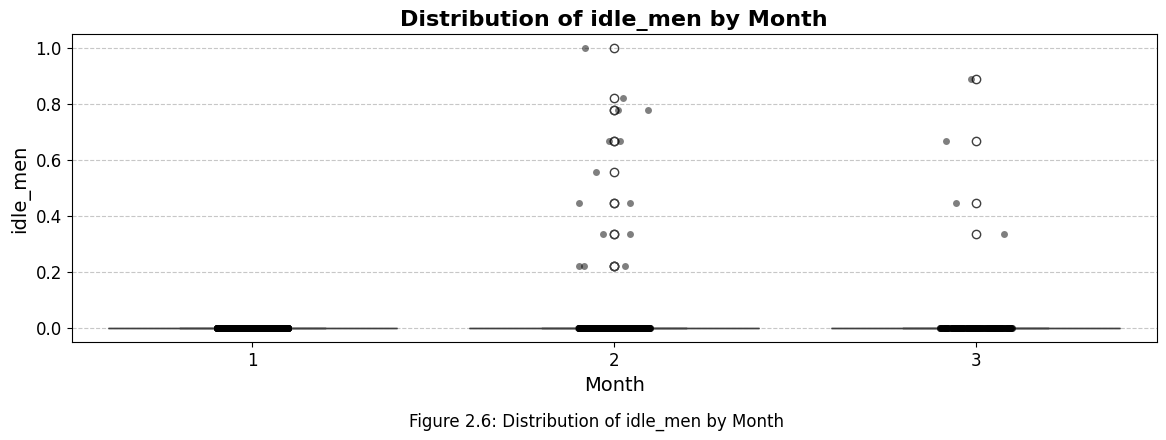

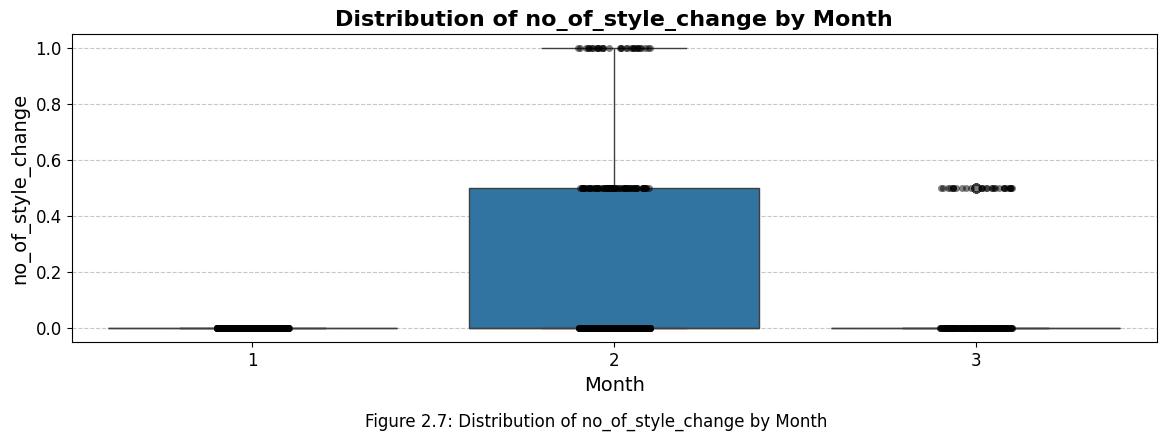

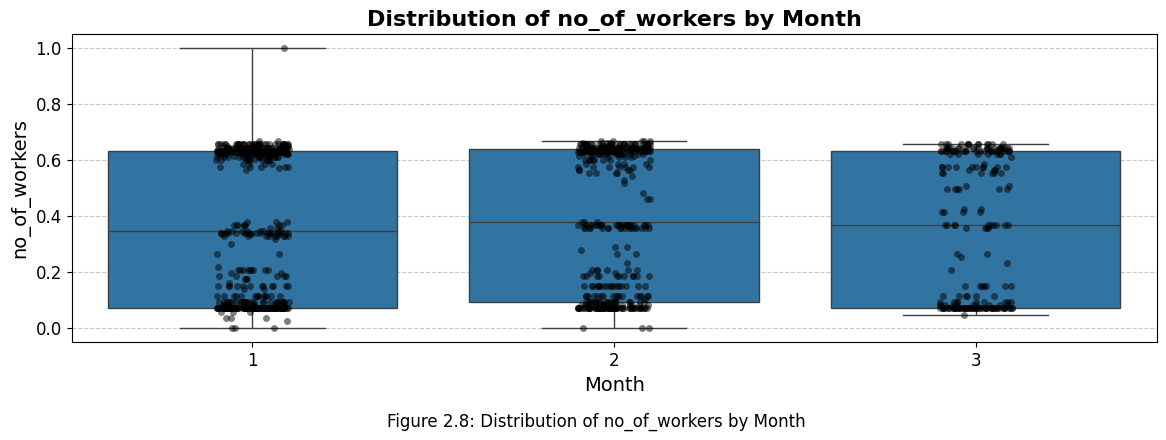

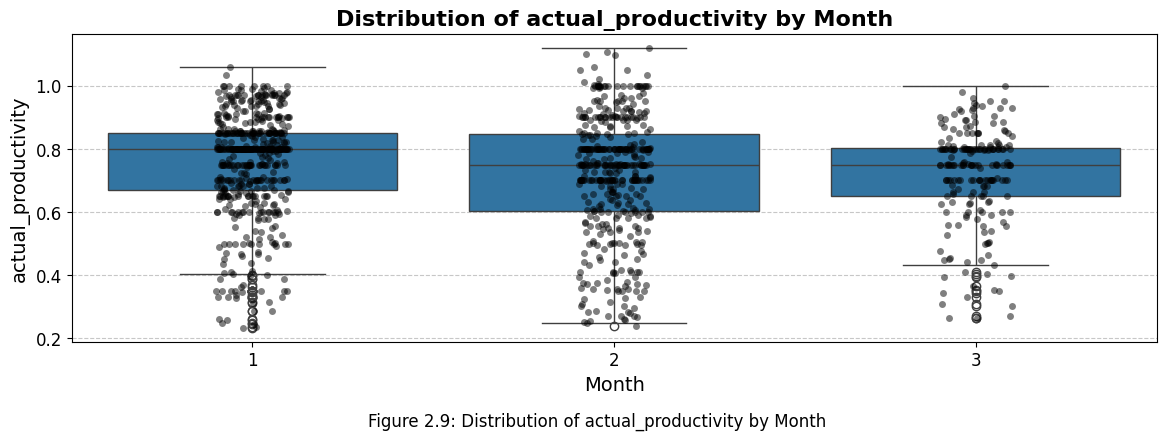

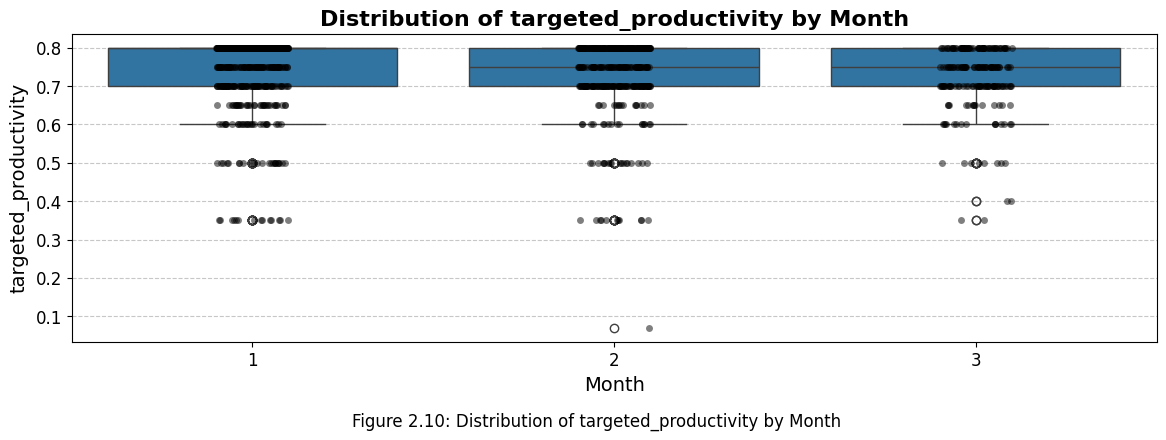

In [9]:
true_numeric_columns = ['unscalled_over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                        'no_of_style_change', 'no_of_workers', 'actual_productivity', 'targeted_productivity']

# Ensure output directory exists
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

# Starting figure number
figure_number = 2.1

# Starting figure number
major_figure_number = 2  # Represents the major part (e.g., 2.x)
minor_figure_number = 1  # Represents the minor part (e.g., x.1)

# Visualize distributions of numeric columns
for col in true_numeric_columns:
    figure_number = f"{major_figure_number}.{minor_figure_number}" # Combine major and minor figure numbers for the filename
    plt.figure(figsize=(14, 4))  # Adjust figure size
    sns.boxplot(x='month', y=col, data=df, showfliers=True)  # Boxplot
    sns.stripplot(x='month', y=col, data=df, color='black', alpha=0.5, jitter=0.1, dodge=False)  # Reduced jitter
    plt.title(f'Distribution of {col} by Month', fontsize=16, fontweight='bold')  # Title
    plt.xlabel('Month', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
    plt.figtext(0.5, -0.1, f"Figure {figure_number}: Distribution of {col} by Month", ha='center', fontsize=12) # Add figure label as a caption
    
    
    figure_filename = os.path.join(output_dir, f"Figure_{figure_number}.png")
    plt.savefig(figure_filename, bbox_inches='tight')
    
    # Increment the minor figure number
    minor_figure_number += 1
    
    plt.show()


As shown in Figure 2.1, it shows the distribution of over time per month. The chart shows different patterns in overtime hours over three months. In Month 1, the median overtime is higher and more varied than in Months 2 and 3. This might mean there's a seasonal pattern, like a busy time with more work or production, possibly due to certain needs or deadlines. Also, some extreme values in Month 1, almost reaching the highest possible overtime of 1.0, could be due to unusual events, like sudden staff shortages or urgent project needs, causing some workers or days to have much higher overtime.

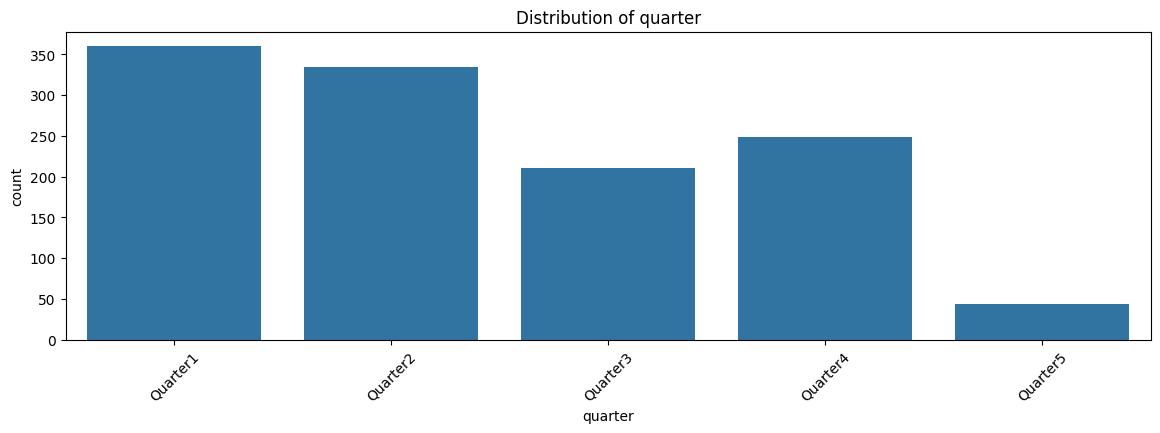

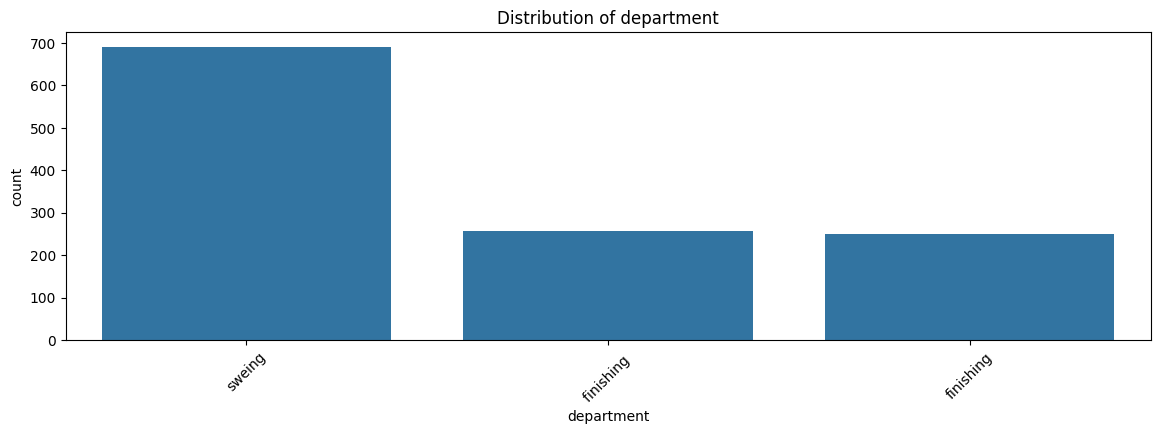

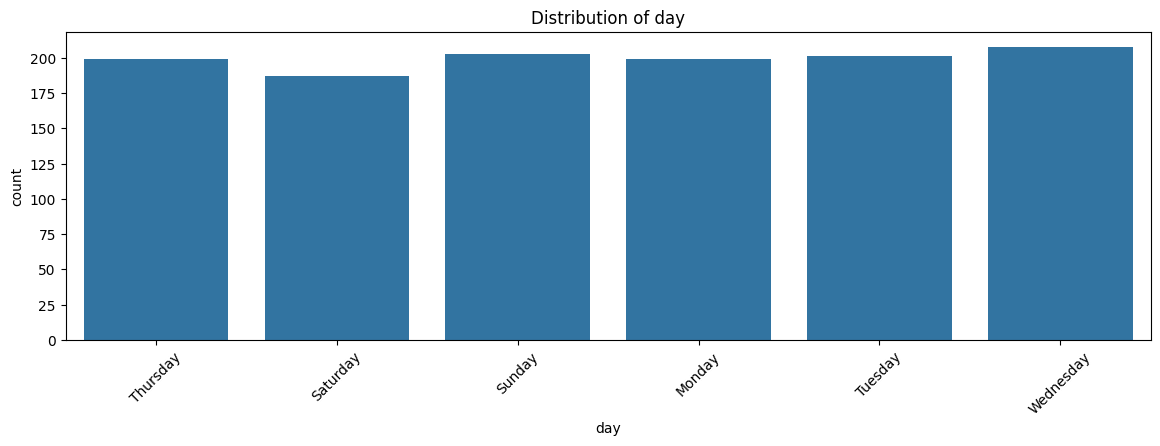

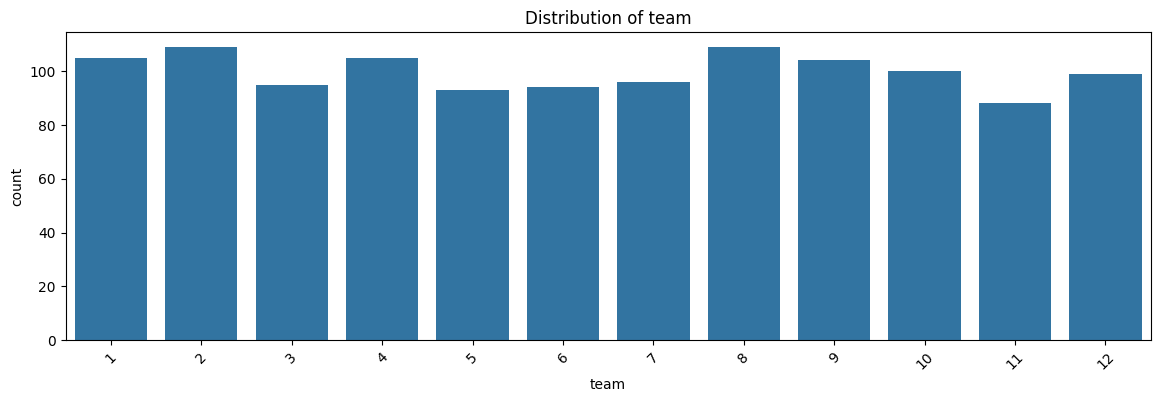

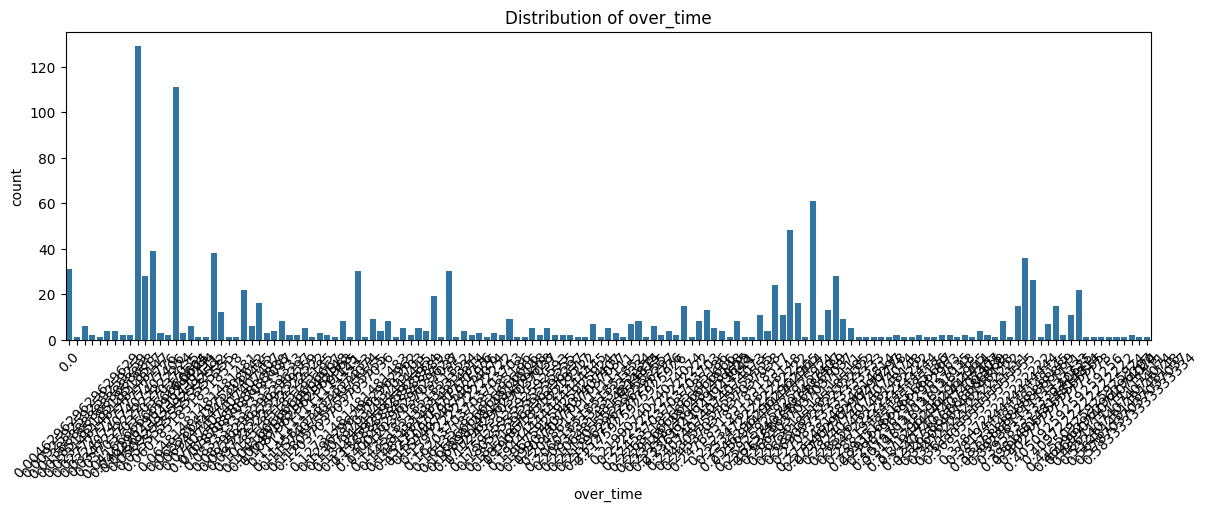

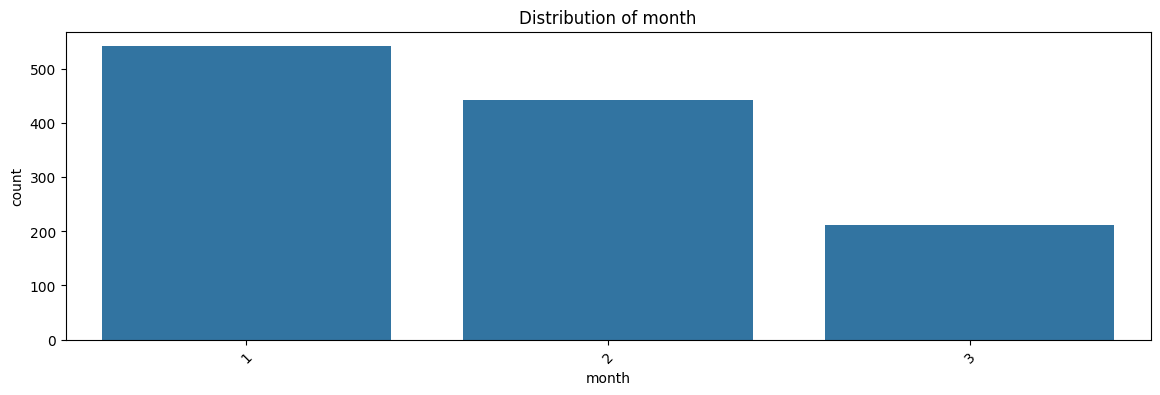

In [10]:
# Create a list of columns excluding the true numeric ones
remaining_columns = [col for col in df.columns if col not in true_numeric_columns and col != 'date']

# Filter the remaining categorical columns (assuming they're not numeric)
categorical_columns = df[remaining_columns]

# Check unique values and distributions for the remaining categorical features
for col in categorical_columns:
    plt.figure(figsize=(14, 4))  # Width: 14 inches, Height: 8 inches
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

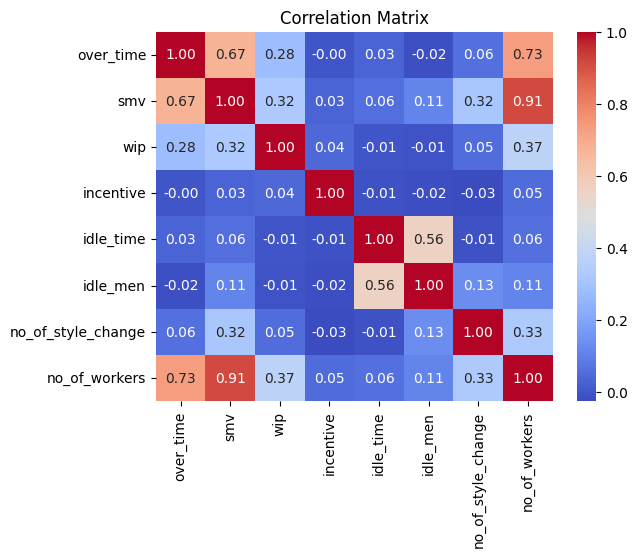

Correlation with Overtime:
 over_time             1.000000
no_of_workers         0.734164
smv                   0.674887
wip                   0.276529
no_of_style_change    0.059790
idle_time             0.031038
incentive            -0.004793
idle_men             -0.017913
Name: over_time, dtype: float64


In [11]:
# Correlation matrix
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Correlations with 'over_time'
correlation_with_overtime = numeric_columns.corr()['over_time'].sort_values(ascending=False)
print("Correlation with Overtime:\n", correlation_with_overtime)


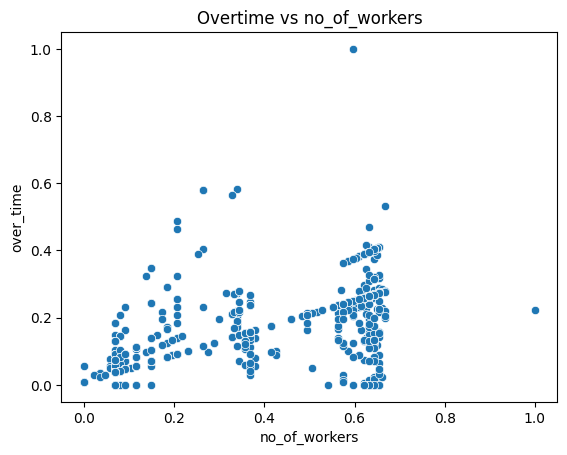

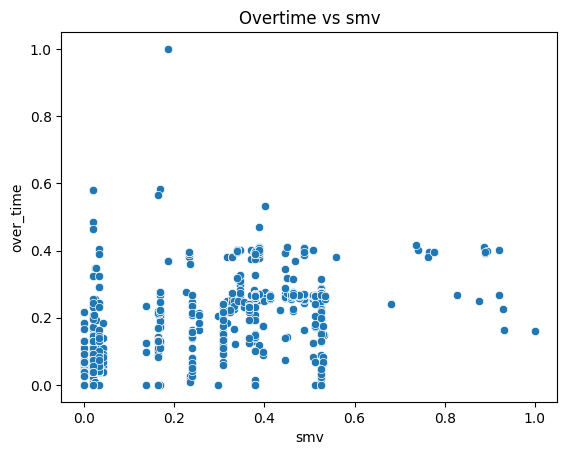

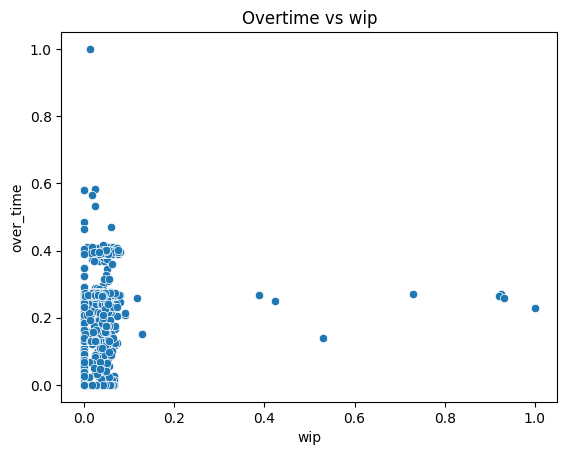

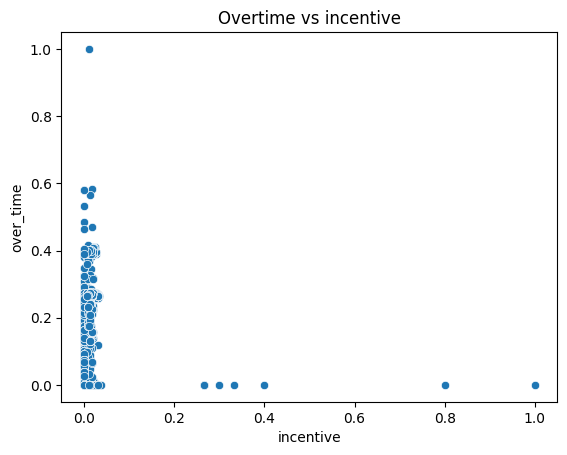

In [12]:
# Scatterplots for numeric columns
for col in ['no_of_workers', 'smv', 'wip', 'incentive']:
    sns.scatterplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime vs {col}')
    plt.show()


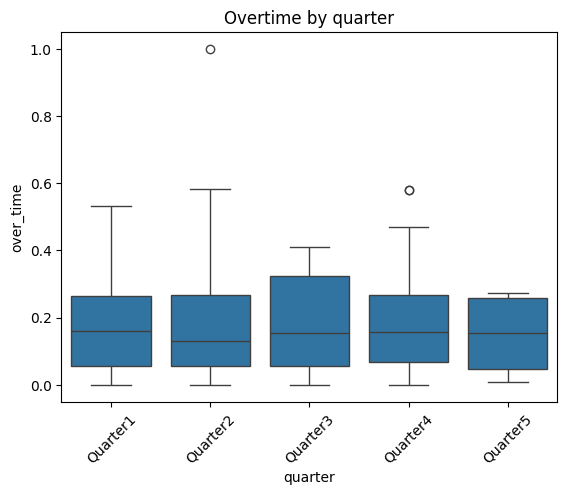

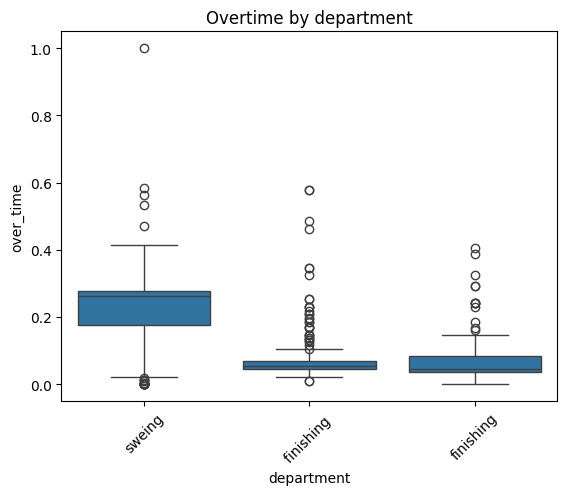

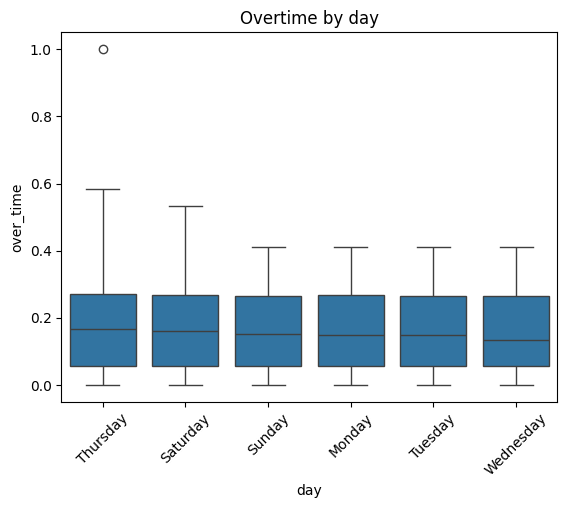

In [13]:
# Boxplots for categorical features
for col in ['quarter', 'department', 'day']:
    sns.boxplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime by {col}')
    plt.xticks(rotation=45)
    plt.show()


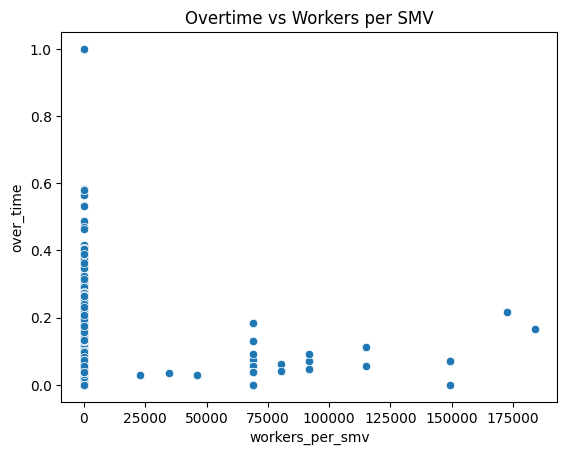

         over_time           targeted_productivity actual_productivity
              mean       std                  mean                mean
quarter                                                               
Quarter1  0.172875  0.111714              0.744083            0.751560
Quarter2  0.168018  0.140886              0.732090            0.743710
Quarter3  0.188889  0.140572              0.721190            0.704759
Quarter4  0.187162  0.129010              0.714516            0.709067
Quarter5  0.143729  0.105291              0.718182            0.826177


In [14]:
# Interaction terms (e.g., workers_per_smv)
df['workers_per_smv'] = df['no_of_workers'] / (df['smv'] + 1e-6)
sns.scatterplot(x='workers_per_smv', y='over_time', data=df)
plt.title('Overtime vs Workers per SMV')
plt.show()

# Group-Wise Analysis
grouped = df.groupby('quarter').agg({
    'over_time': ['mean', 'std'],
    'targeted_productivity': ['mean'],
    'actual_productivity': ['mean']
})
print(grouped)


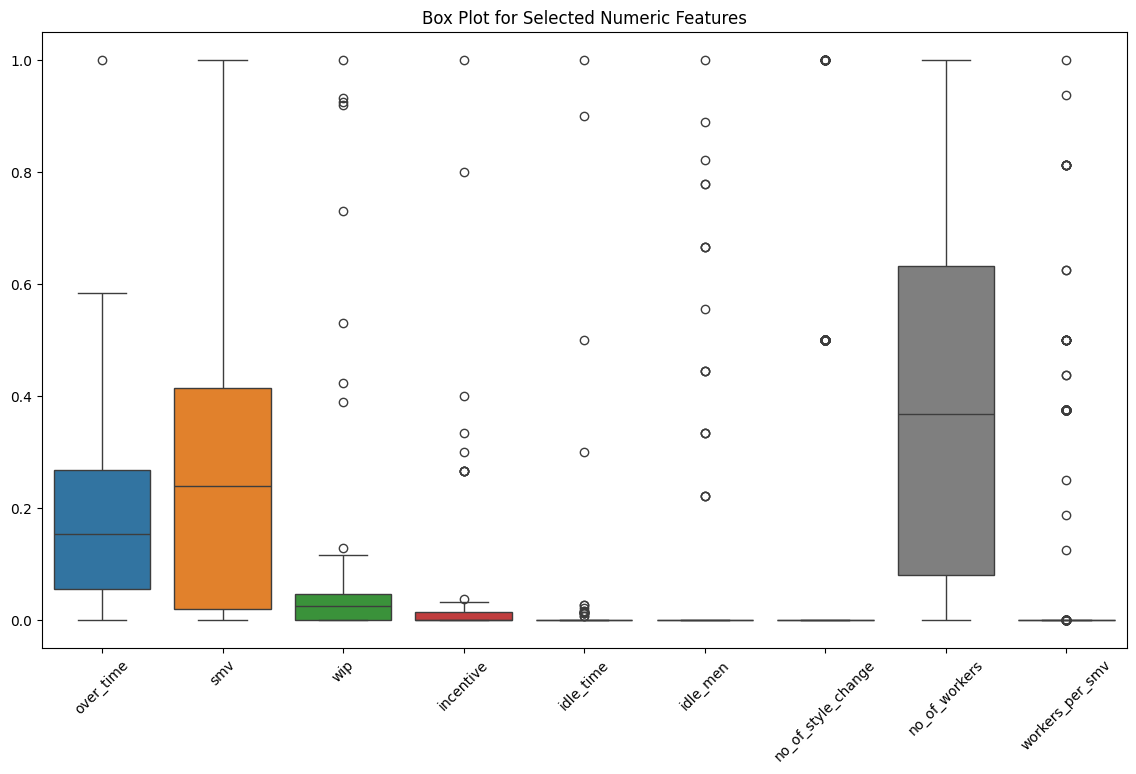

Outliers:
           date   quarter  department       day  team  targeted_productivity  \
138 2015-01-08  Quarter2      sweing  Thursday    12                   0.80   
139 2015-01-08  Quarter2      sweing  Thursday     6                   0.80   
146 2015-01-08  Quarter2      sweing  Thursday    11                   0.35   
383 2015-01-22  Quarter4  finishing   Thursday     1                   0.70   
384 2015-01-22  Quarter4  finishing   Thursday     2                   0.70   

          smv       wip  over_time  incentive  idle_time  idle_men  \
138  0.168602  0.023700   0.583333   0.017500        0.0       0.0   
139  0.164731  0.017775   0.564815   0.013889        0.0       0.0   
146  0.186218  0.012412   1.000000   0.010556        0.0       0.0   
383  0.020132  0.000000   0.578704   0.000000        0.0       0.0   
384  0.020132  0.000000   0.578704   0.000000        0.0       0.0   

     no_of_style_change  no_of_workers  actual_productivity  \
138                 0.0       

In [15]:
# Normalize the 'workers_per_smv' column
df['workers_per_smv'] = scaler.fit_transform(df[['workers_per_smv']])

# Define the columns to include in the boxplot
selected_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                    'no_of_style_change', 'no_of_workers', 'workers_per_smv']

# Boxplot for selected numeric features
plt.figure(figsize=(14, 8))  # Width: 14 inches, Height: 8 inches
sns.boxplot(data=df[selected_columns])  # Use only the selected columns
plt.title('Box Plot for Selected Numeric Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Z-score method for outlier detection
df['z_score'] = zscore(df['over_time'])
outliers = df[df['z_score'].abs() > 3]
print("Outliers:\n", outliers)


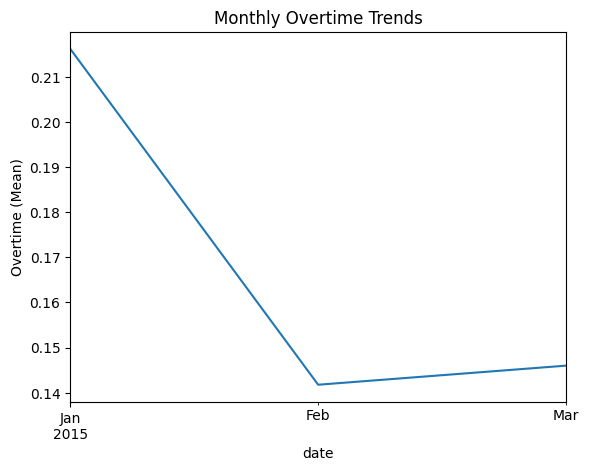

In [16]:
# Trends over time
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df['over_time'].resample('M').mean().plot()
plt.title('Monthly Overtime Trends')
plt.ylabel('Overtime (Mean)')
plt.show()


In [17]:
#Small Cleaning
finish = ["finishing ", "finishing"]
df.loc[df.department.isin(finish), "department"] = 'finishing'

In [18]:
df['categorical_over_time'] = df['unscalled_over_time']//60

# Decision Trees

Decision trees

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing   

In [20]:
def compute_mse(predictions, actual):
    return np.square(predictions-actual).mean()

def compute_accuracy(predictions, actual):
    return sum(predictions==actual)/len(actual) * 100

def describe_tree(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    values = clf.tree_.value

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node, values: {values}.".format(
                    space=node_depth[i] * "\t", node=i, values=values[i]
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )

In [21]:
df.keys()

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'unscalled_over_time', 'month', 'workers_per_smv', 'z_score',
       'categorical_over_time'],
      dtype='object')

Filtering the features considered what could possibly affect overtime and why? </br>
<ul>
    <li>Quarter - It could be possible that some quarters may have trickier situations like cold weather or such which could affect productivity, thus overtime</li>
    <li>Department - Some departments could have better working conditions or synergy which could affect productivity, thus overtime</li>
    <li>Team - Some teams could work better with each other which could affect productivity, thus overtime </li>
    <li>Targeted_productivity - The targeted productivity for the shift which they have to achieve, obviously if they cannot attain this, then they have to overtime </li>
    <li>Smv - The ammount of time it takes to finish a task</li>
    <li>Wip - How many is left unfinished which they have to finish</li>
    <li>Incentive - Motivation for workers to work faster which could affect productivity, thus overtime</li>
    <li>Idle_time - The time production goes idle which could affect productivity, thus overtime</li>
    <li>Idle_men - The ammount of men that goes idle which could affect productivity, thus overtime</li>
    <li>No_of_workers - Number of workers working on the task</li>
    <li>Actual_productivity - <strike>which could affect productivity, thus overtime...</strike> Joke lng </li>
    <li>Actual_productivity - The actual productivity that was finished for the shift </li>
    <li>Month - The month which could affect the productivity requirement when products are in season</li>
    <li>Worker_per_smv - How many workers are working on a certain task</li>
</ul>


In [22]:
dt_df = df.iloc[:,[
                0, #quarter
                1, #department
#                2, #day
                3, #team
                4, #targeted_productivity
                5, #smv
                6, #wip
                8, #incentive
                9, #idle_time
                10, #idle_men
#                11, #no_of_style_change
                12, #no_of_workers
                13, #actual_productivity
                15, #month
                16, #worker_per_smv

#                7 #over_time
#                14 #unscalled_over_time
                18 #categorical_over_time
                ]]

for i in range(len(dt_df.keys())):
    print(f'{str(i) + " : " + dt_df.keys()[i]}')


0 : quarter
1 : department
2 : team
3 : targeted_productivity
4 : smv
5 : wip
6 : incentive
7 : idle_time
8 : idle_men
9 : no_of_workers
10 : actual_productivity
11 : month
12 : workers_per_smv
13 : categorical_over_time


Since the data technically has features that are not in numbers, we have to change them into number representation via Label Encoding

In [23]:
label_enc = preprocessing.LabelEncoder()
label_enc.fit(dt_df["department"])
label_enc.transform(dt_df["department"])

print("Original labels:", label_enc.classes_, "\n")

print("Mapping from nominal to numerical labels:")
print(dict(zip(label_enc.classes_,label_enc.transform(label_enc.classes_))))

dt_df["department"] = label_enc.transform(dt_df["department"])

label_enc = preprocessing.LabelEncoder()
label_enc.fit(dt_df["quarter"])
label_enc.transform(dt_df["quarter"])

print("Original labels:", label_enc.classes_, "\n")

print("Mapping from nominal to numerical labels:")
print(dict(zip(label_enc.classes_,label_enc.transform(label_enc.classes_))))

dt_df["quarter"] = label_enc.transform(dt_df["quarter"])

Original labels: ['finishing' 'sweing'] 

Mapping from nominal to numerical labels:
{'finishing': 0, 'sweing': 1}
Original labels: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5'] 

Mapping from nominal to numerical labels:
{'Quarter1': 0, 'Quarter2': 1, 'Quarter3': 2, 'Quarter4': 3, 'Quarter5': 4}


C:\Users\user\AppData\Local\Temp\ipykernel_14996\3758681289.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_df["department"] = label_enc.transform(dt_df["department"])
C:\Users\user\AppData\Local\Temp\ipykernel_14996\3758681289.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_df["quarter"] = label_enc.transform(dt_df["quarter"])


We now divide the dataframe to X and y where all features except the last column is moved to X while the last column goes to y, which is the label we are trying to predict

In [24]:
X = dt_df.values[:,:-1]
y = dt_df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (837, 13)
y_train shape :  (837,)
X_test shape :  (360, 13)
y_test shape :  (360,)


# For this model, we will try to experiment with both Regressor and Classifier Decision Trees. Why the need to try both?

Initially I have tried to do the task in Regression only since it is a numerical data but it had encountered many problems with limitations of what it could predict to certain values only which is also affected by the max leaf nodes. Since in regression, the model does not have a formula, it will simply divide the data and take the average for the prediction which when having only n leaf nodes means that the max variations of values it predicts will only be n. </br>
Why classifier? Well... when we assume the data to be classification task, it can technically reach more values in its predictions. The problem though with Classification is that when it does not hit, it really just does not hit properly. What I mean by this is that the value it predicts may be the exact amount of hours in overtime or a value far from it. It does not consider a mathematical sense when predicting unlike the Regressor.

We remove the hyperparameter to the Max Leaf Nodes since the range of the values is too large, having the max leaf node will limit the tree's prediction to only some set of values.

In [54]:
dtr = DecisionTreeRegressor(criterion='squared_error')

hyperparameters = [
    {
        'min_impurity_decrease': [0.001,0.01,0.05,0.1,0.3,0.5],
        'max_depth': [20,30,40,50],
        'min_samples_split': [2,4,6,10,15,20],
    }
]

rsr = RandomizedSearchCV(estimator=dtr, param_distributions=hyperparameters, n_iter=50, cv=5, random_state=42, scoring='neg_mean_squared_error',)

rsr.fit(X_train, y_train)

rsr.best_params_

{'min_samples_split': 20, 'min_impurity_decrease': 0.1, 'max_depth': 20}

For classification, we can keep the max leaf nodes since technically our data is assumed to be categorical and not mathematical, therefore the predictions it will make can be of any of the "classes" of numbers defined for overtime

In [55]:
dtc = DecisionTreeClassifier()

hyperparameters = [
    {
        'criterion' : ['gini','entropy'],
        'max_depth': [10,20,30,40,50],
        'min_samples_split': [2,4,6,10,15,20],
        'max_leaf_nodes': [3,5,10,20,50,100,200],
    }
]

rsc = RandomizedSearchCV(estimator=dtc, param_distributions=hyperparameters, n_iter=50, cv=5, random_state=42)

rsc.fit(X_train, y_train)

rsc.best_params_

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'min_samples_split': 6,
 'max_leaf_nodes': 100,
 'max_depth': 40,
 'criterion': 'entropy'}

In [56]:
dtr = rsr.best_estimator_

dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, min_impurity_decrease=0.1,
                      min_samples_split=20)

In [57]:
dtc = rsc.best_estimator_

dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40, max_leaf_nodes=100,
                       min_samples_split=6)

In [63]:
predictions_train_r = dtr.predict(X_train)
predictions_train_c = dtc.predict(X_train)

print("MSE: ", compute_mse(predictions_train_r, y_train))
print("MSE: ", compute_mse(predictions_train_c, y_train))
predictions_train_m = np.add(predictions_train_r, predictions_train_c)/2
print("MSE: ", compute_mse(predictions_train_m, y_train))

predictions_train_df = pd.DataFrame({'true' : y_train, 'pred_r' : predictions_train_r, 'pred_c' : predictions_train_c, 'pred_m' : predictions_train_m})
predictions_train_df

MSE:  478.4132171760906
MSE:  1100.8853046594982
MSE:  593.6246589629802


,true,pred_r,pred_c,pred_m
0,104.0,98.200000,104.0,101.100000
1,171.0,172.117647,171.0,171.558824
2,177.0,179.100000,177.0,178.050000
3,171.0,168.611111,171.0,169.805556
4,116.0,114.724138,116.0,115.362069
...,...,...,...,...
832,114.0,100.666667,114.0,107.333333
833,116.0,113.416667,116.0,114.708333
834,76.0,71.500000,96.0,83.750000
835,112.0,111.800000,112.0,111.900000


In [64]:
predictions_test_r = dtr.predict(X_test)
predictions_test_c = dtc.predict(X_test)

print("Regressor MSE: ", compute_mse(predictions_test_r, y_test))
print("Classifier MSE: ", compute_mse(predictions_test_c, y_test))
predictions_test_m = np.add(predictions_test_r, predictions_test_c)/2
print("Mean MSE: ", compute_mse(predictions_test_m, y_test))

predictions_test_df = pd.DataFrame({'true' : y_test, 'pred_r' : predictions_test_r, 'pred_c' : predictions_test_c, 'pred_m' : predictions_test_m})
predictions_test_df

Regressor MSE:  1015.4388593627043
Classifier MSE:  1507.3777777777777
Mean MSE:  952.781005023017


,true,pred_r,pred_c,pred_m
0,68.0,66.166667,68.0,67.083333
1,44.0,45.333333,44.0,44.666667
2,30.0,34.000000,30.0,32.000000
3,16.0,16.432432,16.0,16.216216
4,38.0,38.666667,110.0,74.333333
...,...,...,...,...
355,171.0,172.117647,114.0,143.058824
356,116.0,179.100000,116.0,147.550000
357,85.0,174.300000,171.0,172.650000
358,114.0,115.333333,114.0,114.666667


Finally, we took the mean of the results which will be explained later on. For the data itself, we can see that regressor generally does better than classifier so why do we need to do the classifier then?

The main reason is since there are instances that regressor predicts too far or because of the limitations of the values it can predict to certain numbers, regressor may have a further prediction than classifier. As for classifier, for atleast 50% of the instances, it hits the "class" properly and exact but some instances predicted are far from the right answer. To solve both problems, we take the mean of the two which for some cases could do worse than regressor, but sometimes can do better when regressor is making too much mistakes like in test sets that it did not fit on. Decision trees try to overfit the data as much as it can so when it comes to the test set, there could be bigger errors. With this, the errors from the regressor model could be cancelled out even by a bit with the classifier model and vice versa, leading to a lower error. 